# Lab | Data cleaning and wrangling

For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs.

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, Normalizer, LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [116]:
# load the final dataset from  previous lab
customer_df = pd.read_csv('customer_df.csv') 
customer_df.head()

,Unnamed: 0,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,0,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,1,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,2,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,3,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,4,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [117]:
#It seems that the time variable was saved as object and not date so I'm doing the conversion again
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'], infer_datetime_format=True)

In [118]:
customer_df = customer_df.drop(['Unnamed: 0'], axis=1)
customer_df.head()

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


### 1. We will start with removing outliers. So far, we have discussed different methods to remove outliers. Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe.

In [119]:
# getting numerical
customer_df_num = customer_df._get_numeric_data()

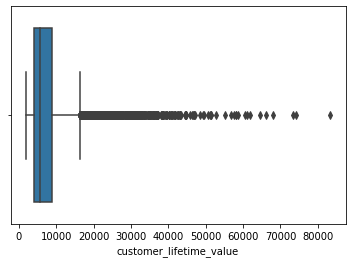

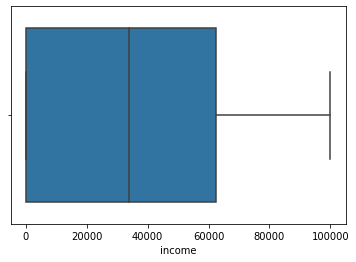

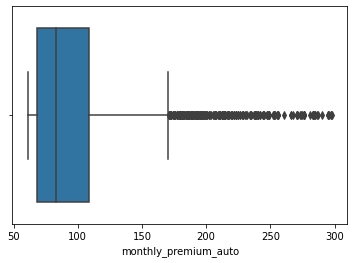

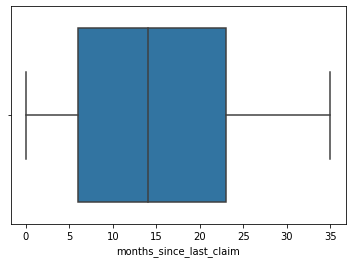

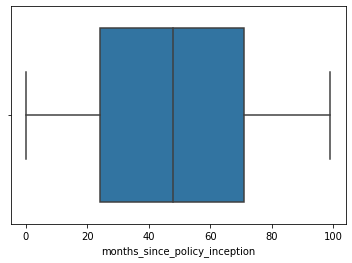

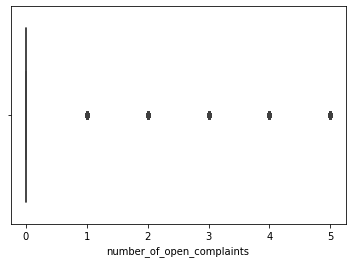

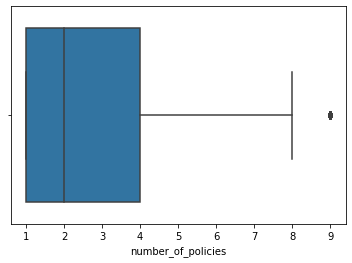

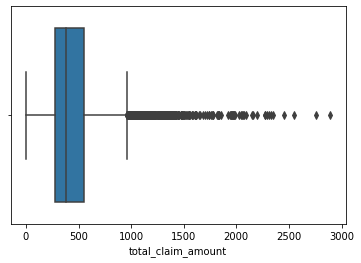

In [120]:
# vizualizing outliers

for col in customer_df_num:
    sns.boxplot(customer_df_num[col])
    plt.show()

In [121]:
def remove_outliers(df, threshold=1.5, in_columns=[]):
    for column in in_columns:
        upper = np.percentile(df[column],75)
        lower = np.percentile(df[column],25)
        iqr = upper - lower
        upper_limit = upper + (threshold * iqr)
        lower_limit = lower - (threshold * iqr)
        df = df[(df[column]>lower_limit) & (df[column]<upper_limit)]
    return df

In [122]:
customer_df = remove_outliers(customer_df, threshold=1.5, in_columns=['customer_lifetime_value','monthly_premium_auto','number_of_policies','total_claim_amount'])

In [123]:
customer_df

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
5,Oregon,8256.297800,Yes,Basic,Bachelor,2011-01-25,Employed,F,62902,Rural,...,94,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9128,California,4100.398533,No,Premium,College,2011-01-06,Employed,F,47761,Suburban,...,58,0,1,Personal Auto,Personal L2,Offer1,Branch,541.282007,Four-Door Car,Large
9130,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,Suburban,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,Suburban,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,Suburban,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


### 2. Create a copy of the dataframe for the data wrangling.

In [124]:
customer_df_1 = customer_df.copy()

### 3. Normalize the continuous variables. You can use any one method you want.

In [125]:
# Normalization

transformer = Normalizer().fit(customer_df_num)
x_normalized = transformer.transform(customer_df_num)
x_normalized

array([[4.90479814e-02, 9.98772156e-01, 1.22463800e-03, ...,
        0.00000000e+00, 1.77483768e-05, 6.82977323e-03],
       [9.87006407e-01, 0.00000000e+00, 1.32929472e-02, ...,
        0.00000000e+00, 1.13131466e-03, 1.60005358e-01],
       [2.55477793e-01, 9.66746974e-01, 2.14096978e-03, ...,
        0.00000000e+00, 3.96475885e-05, 1.12296293e-02],
       ...,
       [9.95277200e-01, 0.00000000e+00, 1.03625303e-02, ...,
        3.65736364e-04, 2.43824242e-04, 9.64062747e-02],
       [3.24247237e-01, 9.45493129e-01, 4.13688256e-03, ...,
        0.00000000e+00, 1.29277580e-04, 2.97855545e-02],
       [9.89138089e-01, 0.00000000e+00, 2.91609456e-02, ...,
        0.00000000e+00, 3.78713580e-04, 1.39972539e-01]])

In [126]:
customer_df_num.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

In [127]:
x_normalized_cols = ['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount']

In [128]:
num_normalized = pd.DataFrame(x_normalized, columns = x_normalized_cols)
num_normalized

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,0.049048,0.998772,0.001225,0.000568,0.000089,0.000000,0.000018,0.006830
1,0.987006,0.000000,0.013293,0.001838,0.005939,0.000000,0.001131,0.160005
2,0.255478,0.966747,0.002141,0.000357,0.000753,0.000000,0.000040,0.011230
3,0.997473,0.000000,0.013829,0.002348,0.008480,0.000000,0.000913,0.069128
4,0.064055,0.997940,0.001662,0.000273,0.001002,0.000000,0.000023,0.003145
...,...,...,...,...,...,...,...,...
9129,0.309385,0.950932,0.000965,0.000238,0.001176,0.000000,0.000026,0.002620
9130,0.141858,0.989727,0.003619,0.000641,0.001283,0.000000,0.000046,0.017372
9131,0.995277,0.000000,0.010363,0.001097,0.004511,0.000366,0.000244,0.096406
9132,0.324247,0.945493,0.004137,0.001465,0.000129,0.000000,0.000129,0.029786


### 4. Encode the categorical variables

In [129]:
df_cat = customer_df.select_dtypes('object')
df_cat.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
5,Oregon,Yes,Basic,Bachelor,Employed,F,Rural,Married,Personal Auto,Personal L3,Offer2,Web,Two-Door Car,Medsize


In [130]:
df_cat= pd.get_dummies(df_cat, drop_first=True)
df_cat

,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,coverage_Extended,coverage_Premium,education_College,education_Doctor,education_High School or Below,...,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9128,1,0,0,0,0,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0
9130,1,0,0,0,1,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
9131,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
9132,1,0,0,0,0,1,0,1,0,0,...,1,0,1,0,0,0,0,0,0,0


Should we apply the same encoding approach on the entire dataframe to maintain consistency of the datas or is it possible to apply the label encoding on some columns and OneHotEncoding on the others depending on the datas of the respective columns?

### 5. The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.

In [131]:
date = customer_df['effective_to_date']
date = pd.DataFrame(date)
date

,effective_to_date
0,2011-02-24
2,2011-02-19
3,2011-01-20
4,2011-02-03
5,2011-01-25
...,...
9128,2011-01-06
9130,2011-02-12
9131,2011-02-06
9132,2011-02-03


In [132]:
date['month'] = date['effective_to_date'].dt.month
date['week'] = date['effective_to_date'].dt.week
date['day'] = date['effective_to_date'].dt.day
date

,effective_to_date,month,week,day
0,2011-02-24,2,8,24
2,2011-02-19,2,7,19
3,2011-01-20,1,3,20
4,2011-02-03,2,5,3
5,2011-01-25,1,4,25
...,...,...,...,...
9128,2011-01-06,1,1,6
9130,2011-02-12,2,6,12
9131,2011-02-06,2,5,6
9132,2011-02-03,2,5,3


### 6. Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.

In [133]:
customer_df_final= pd.concat([num_normalized, df_cat, date], axis=1)
customer_df_final.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,state_California,state_Nevada,...,sales_channel_Web,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small,effective_to_date,month,week,day
0,0.049048,0.998772,0.001225,0.000568,0.000089,0.0,0.000018,0.006830,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,2011-02-24,2.0,8.0,24.0
1,0.987006,0.000000,0.013293,0.001838,0.005939,0.0,0.001131,0.160005,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
2,0.255478,0.966747,0.002141,0.000357,0.000753,0.0,0.000040,0.011230,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,2011-02-19,2.0,7.0,19.0
3,0.997473,0.000000,0.013829,0.002348,0.008480,0.0,0.000913,0.069128,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,2011-01-20,1.0,3.0,20.0
4,0.064055,0.997940,0.001662,0.000273,0.001002,0.0,0.000023,0.003145,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,2011-02-03,2.0,5.0,3.0


In [134]:
customer_df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9134 entries, 0 to 9133
Data columns (total 53 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   customer_lifetime_value         9134 non-null   float64       
 1   income                          9134 non-null   float64       
 2   monthly_premium_auto            9134 non-null   float64       
 3   months_since_last_claim         9134 non-null   float64       
 4   months_since_policy_inception   9134 non-null   float64       
 5   number_of_open_complaints       9134 non-null   float64       
 6   number_of_policies              9134 non-null   float64       
 7   total_claim_amount              9134 non-null   float64       
 8   state_California                7399 non-null   float64       
 9   state_Nevada                    7399 non-null   float64       
 10  state_Oregon                    7399 non-null   float64       
 11  stat